# **Building Energy Load Etimation With Linear Regression Models**

### In this study, it was tried to estimate the heat and cooling load of the buildings using linear regression models.
https://www.kaggle.com/elikplim/eergy-efficiency-dataset

**Data Set Information:**

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load



1. Load the dataset from Kaggle to Colab.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d elikplim/eergy-efficiency-dataset
!unzip eergy-efficiency-dataset.zip

In [3]:
import pandas as pd
df = pd.read_csv('/content/ENB2012_data.csv')
df.columns = ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height","Orientation", "Glazing_Area", "Glazing_Area_Distribution", 
              "Heating_Load","Cooling_Load"] #Rename columns
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.info() # Memory usage and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.describe() #Summary statistics

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


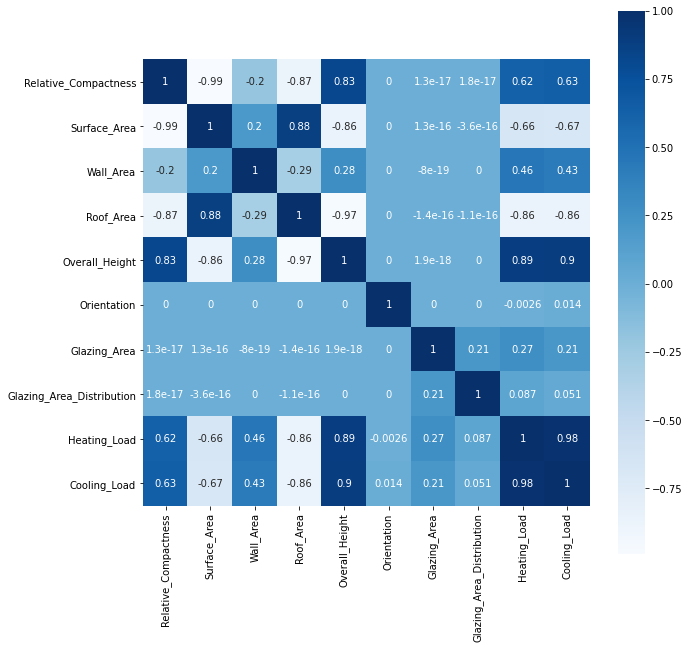

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),square=True,cmap="Blues", linecolor='w',annot=True, ax=ax) 

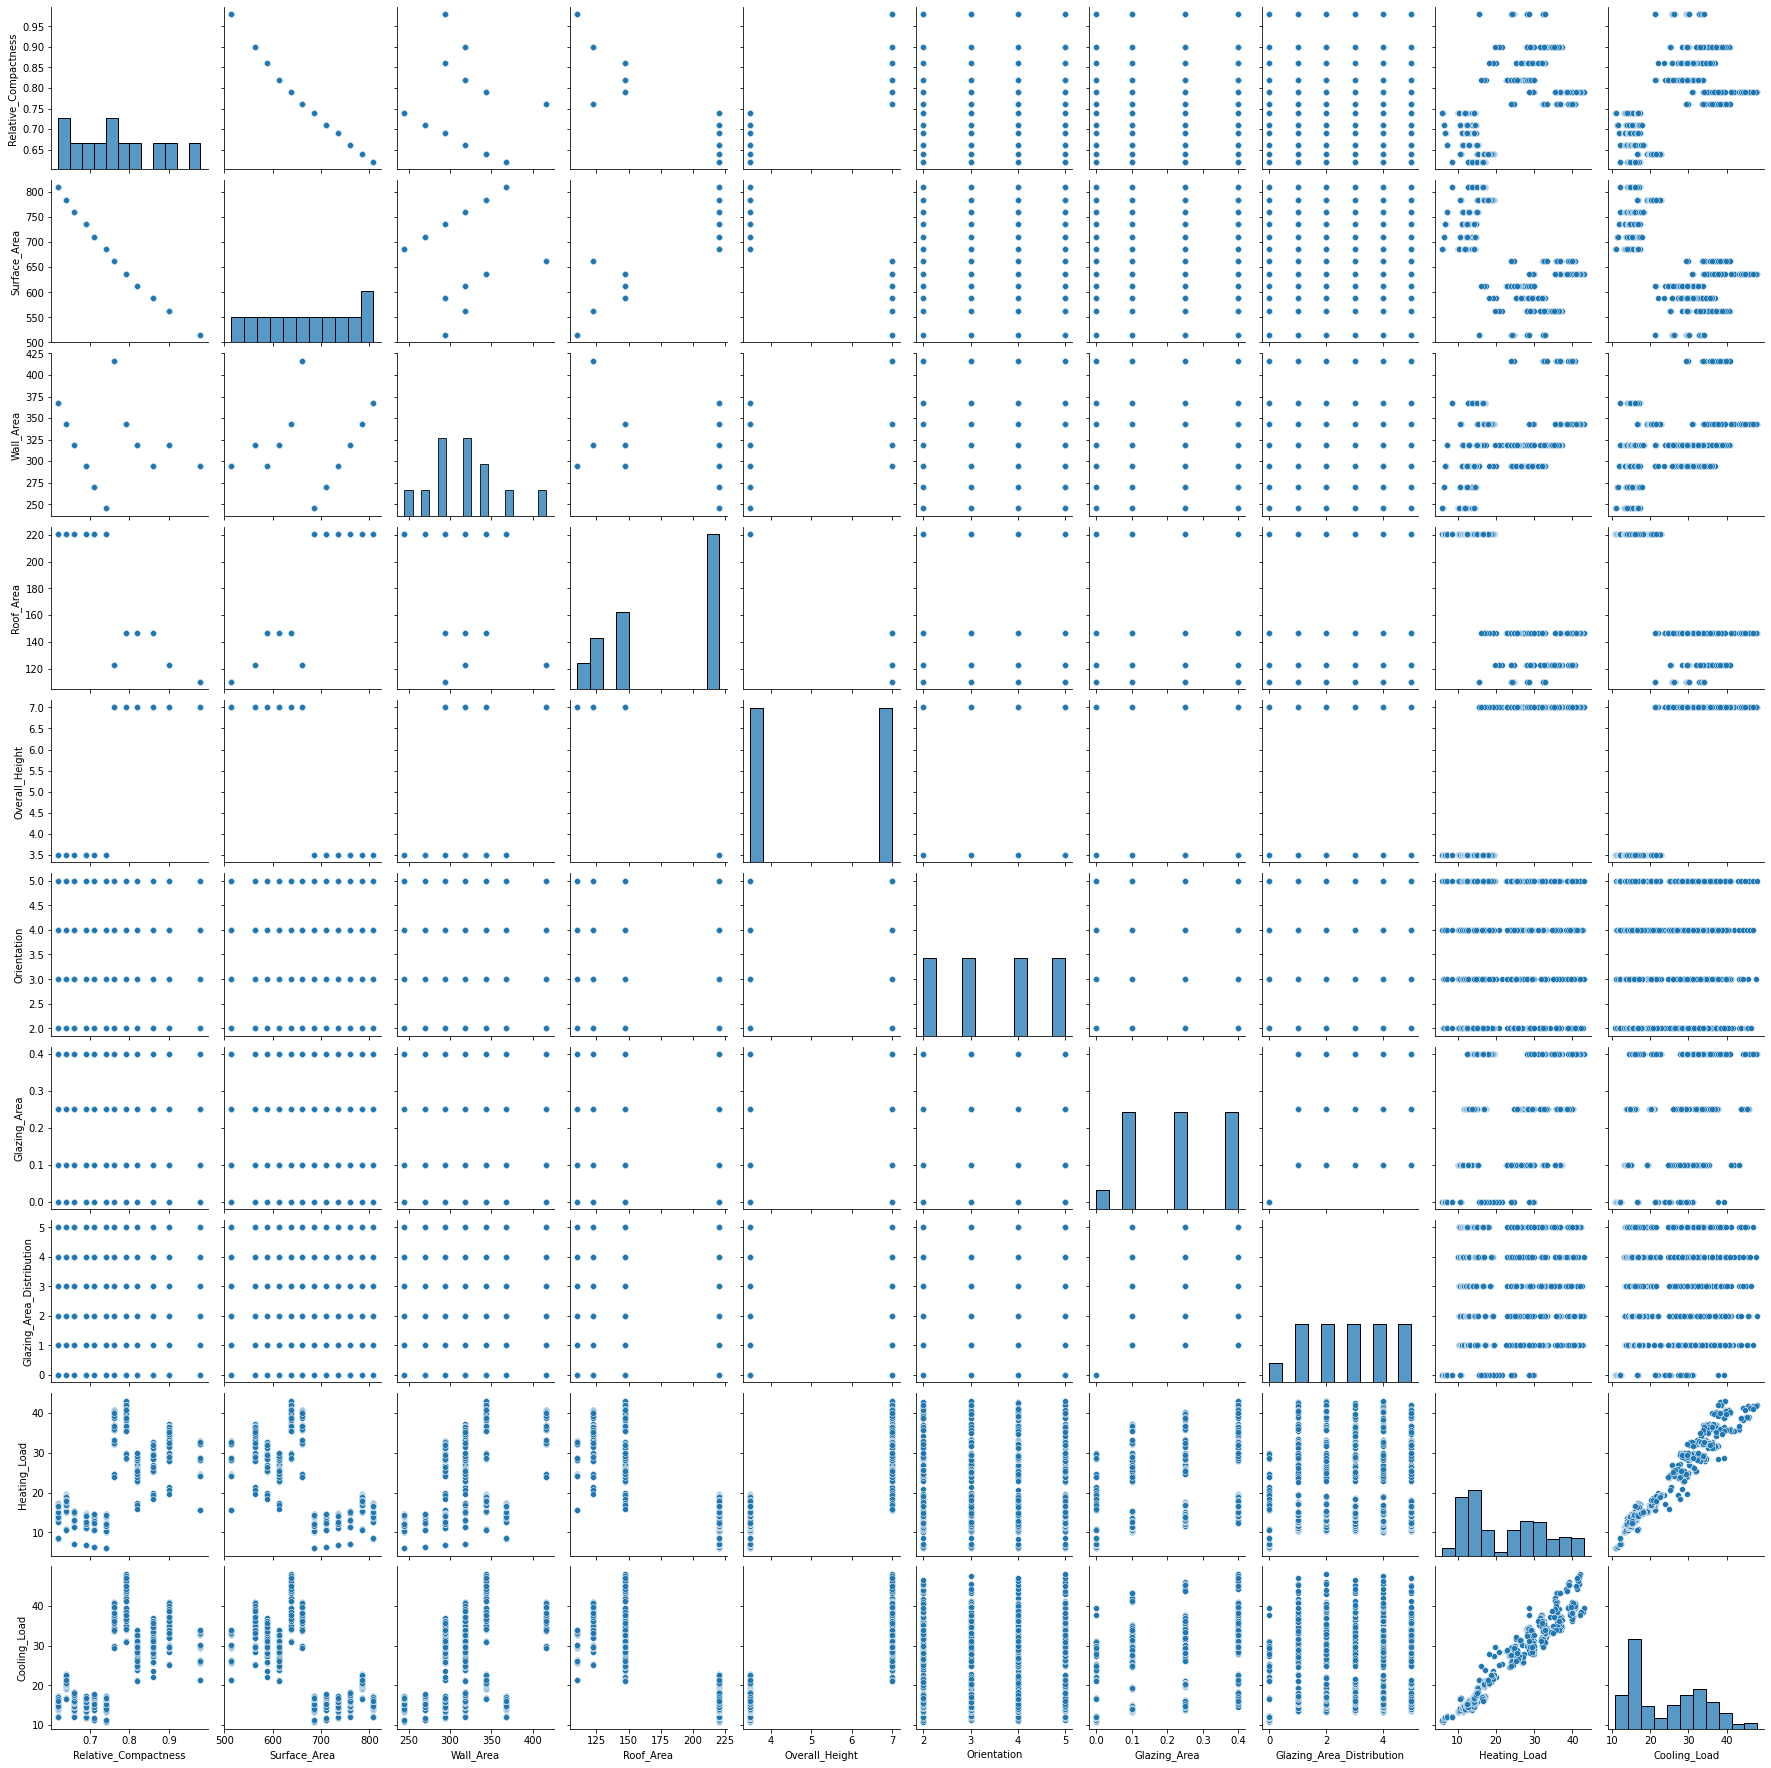

In [6]:
sns.pairplot(df)

2. We separate the dependent and independent variables into X and Y. We will first estimate the Heating Load.

In [ ]:
X = df.drop(["Heating Load","Cooling Load"], axis=1) #dependent variables
y = df[["Heating Load"]] #independent variable

In [ ]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
y.head()

,Heating Load
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1) # Train test split


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
#train error
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

2.8484884617203563

In [ ]:
#test error
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

3.1978138400103697

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error") ##k katlı cross validation
##k katlı cross validation mse
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")) #actual performance of our model

8.347743530350053

In [ ]:
##k katlı cross validation rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

2.8892461872173603

In [ ]:
model.score(X,y)

0.9160351491299472

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
X = df.drop(["Heating Load","Cooling Load"], axis=1) #dependent variables
y = df[["Heating Load"]] #independent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Train test split

In [ ]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.intercept_

array([-26.44074466])

In [ ]:
ridge_model.coef_

array([[-9.21264589e-01,  1.27502117e-02,  3.88017298e-02,
        -1.30257591e-02,  5.09452709e+00, -3.01176833e-02,
         1.31689190e+01,  3.60061281e-01]])

In [ ]:
ridge_model = Ridge().fit(X_train, y_train)

In [ ]:
y_pred = ridge_model.predict(X_train)
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

2.973325298057376

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

2.999839263477583

In [ ]:
#test hatası
y_pred = ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

3.0763127956059972

In [ ]:
ridge_model.score(X,y)

0.9039510950966496

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lasso_model = Lasso().fit(X_train, y_train)
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_model.intercept_

array([37.13222156])

In [ ]:
lasso_model.coef_

array([-0.        , -0.07682217,  0.12800551, -0.02520513,  0.        ,
       -0.        ,  0.        ,  0.1619136 ])

In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.707158616631763

In [ ]:
r2_score(y_test, y_pred)

0.7891984214453573

ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
enet_model = ElasticNet().fit(X_train, y_train)

In [ ]:
enet_model.coef_

array([-0.        , -0.06574199,  0.11730299, -0.02375498,  0.62482229,
       -0.        ,  0.        ,  0.30824004])

In [ ]:
enet_model.intercept_

array([29.1412779])

In [ ]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.559105626128614

In [ ]:
r2_score(y_test, y_pred)

0.8022504512721913

3. Now we will estimate the Cooling Load.

In [ ]:
X = df.drop(["Heating Load","Cooling Load"], axis=1) #dependent variables
y = df[["Cooling Load"]] #independent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1) # Train test split

Multiple regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
model.intercept_

array([98.26744464])

In [ ]:
model.coef_

array([[-7.05912105e+01, -1.36127313e+12,  1.36127313e+12,
         2.72254625e+12,  4.28091812e+00,  1.88376734e-01,
         1.46378048e+01,  9.13991928e-02]])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
#train error
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

3.0571701119831833

In [ ]:
#test error
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

3.6396516428438512

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error") ##k katlı cross validation
##k katlı cross validation mse
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")) #actual performance of our model

9.51929215670727

In [ ]:
##k katlı cross validation rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

3.085335015311509

In [ ]:
model.score(X,y)

0.887938265385953

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Train test split
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.intercept_

array([-23.37010981])

In [ ]:
ridge_model.coef_

array([[-1.02854468e+00,  1.59941632e-02,  2.54236238e-02,
        -4.71473036e-03,  5.27607819e+00,  7.01846577e-02,
         9.54443759e+00,  1.53178452e-01]])

In [ ]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

3.2805297469159447

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

3.312834600138361

In [ ]:
#test hatası
y_pred = ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

3.2349751122851327

In [ ]:
ridge_model.score(X,y)

0.881754096696814

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Train test split
lasso_model = Lasso().fit(X_train, y_train)
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_model.intercept_

array([41.59612629])

In [ ]:
lasso_model.coef_

array([-0.        , -0.07401769,  0.11514064, -0.02267195,  0.        ,
        0.        ,  0.        ,  0.        ])

In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.606830704463653

In [ ]:
r2_score(y_test, y_pred)

0.7726893411588444

ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Train test split
enet_model = ElasticNet().fit(X_train, y_train)

In [ ]:
enet_model.intercept_

array([33.24501861])

In [ ]:
enet_model.coef_

array([-0.        , -0.06218765,  0.10368831, -0.02101925,  0.66999425,
        0.        ,  0.        ,  0.08338702])

In [ ]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.447812384350623

In [ ]:
r2_score(y_test, y_pred)

0.7881110959209588

**Conclusion**

The following is the table when we look at the Test Error RMSE value in estimating both Heating Load and Cooling Load variables:

*   Multiple regression: 3.20, 3.64
*   Ridge Regression: 3.08, 3.24
*   Lasso Regression: 4.71, 4.61 
*   ElasticNet Regression: 4.56, 4.45

We can say that our model established with the Ridge Regression method is better.


